<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: monospace; 
          text-align: center;">
          Clustering with SOM</p>

<p style="text-align: justify; text-justify: inter-word; font-family: monospace;">
   <font size=4>
       We'll use the MiniSom library to implement a SOM for clustering iris dataset, which is a classic dataset in machine learning.
   </font>
</p>

### <span style="color:#12372A; font-weight: bold; font-family: monospace">Required Packages</span>

In [34]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from collections import defaultdict

### <span style="color:#12372A; font-weight: bold; font-family: monospace">Load and Prepare Data</span>

In [3]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

In [4]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [5]:
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,0.555556,0.541667,0.847458,1.000000,2
17,0.222222,0.625000,0.067797,0.083333,0
127,0.500000,0.416667,0.661017,0.708333,2
94,0.361111,0.291667,0.542373,0.500000,1
88,0.361111,0.416667,0.525424,0.500000,1


### <span style="color:#12372A; font-weight: bold; font-family: monospace">Train the Model</span>

In [10]:
# Initialize and train SOM
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)

In [20]:
som.random_weights_init(data)

In [21]:
som.get_weights()[0]

array([[1.        , 0.75      , 0.91525424, 0.79166667],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.5       , 0.33333333, 0.62711864, 0.45833333],
       [0.22222222, 0.20833333, 0.33898305, 0.41666667],
       [0.75      , 0.5       , 0.62711864, 0.54166667],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.22222222, 0.625     , 0.06779661, 0.08333333],
       [0.55555556, 0.20833333, 0.66101695, 0.58333333],
       [0.38888889, 0.25      , 0.42372881, 0.375     ],
       [0.22222222, 0.625     , 0.06779661, 0.08333333]])

In [22]:
som.train_random(data, 100)

In [23]:
som.get_weights()[0]

array([[0.76574003, 0.76468826, 0.63626232, 0.55705725],
       [0.35786014, 0.85263985, 0.07273973, 0.072028  ],
       [0.35710385, 0.4264501 , 0.39827478, 0.32763051],
       [0.23076231, 0.20087297, 0.37273494, 0.40127822],
       [0.55024124, 0.37829246, 0.54895721, 0.49131912],
       [0.82412645, 0.39657065, 0.87028226, 0.76806761],
       [0.26929575, 0.58323767, 0.14036312, 0.14195683],
       [0.55729429, 0.23238597, 0.64257048, 0.56357092],
       [0.42261775, 0.27391736, 0.46054694, 0.41441292],
       [0.25748833, 0.59054131, 0.10244074, 0.11878312]])

In [26]:
# som.winner will return the co-ordinates
som.winner(data[0])

(7, 3)

### <span style="color:#12372A; font-weight: bold; font-family: monospace">Storing Cluster Assignments</span>

In [35]:
# Create a dictionary to hold the cluster assignments
bmu_to_cluster = defaultdict(list)
bmu_to_cluster

defaultdict(list, {})

In [36]:
# Map each data point to its BMU and store the target label
for i, x in enumerate(data):
    bmu = som.winner(x)
    bmu_to_cluster[bmu].append(target[i])
bmu_to_cluster

defaultdict(list,
            {(7, 3): [0, 0, 0, 0, 0, 0],
             (4, 4): [0, 0, 0, 0, 0, 0, 0],
             (6, 2): [0, 0, 0, 0, 0, 0],
             (7, 2): [0, 0, 0],
             (0, 1): [0, 0, 0, 0, 0, 0, 0],
             (7, 4): [0, 0, 0, 0],
             (8, 2): [0, 0, 0, 0, 0],
             (9, 2): [0, 0],
             (1, 0): [0, 0],
             (4, 8): [0],
             (2, 1): [0, 0, 0],
             (0, 9): [0],
             (7, 5): [0, 0],
             (4, 9): [0],
             (2, 6): [1, 1, 1],
             (6, 9): [1],
             (8, 0): [1, 1],
             (7, 0): [1, 2, 2, 2],
             (8, 9): [1],
             (2, 9): [1, 1],
             (0, 3): [1, 1, 1],
             (1, 7): [1],
             (4, 6): [1],
             (6, 8): [1],
             (9, 5): [1],
             (4, 0): [1, 1],
             (9, 4): [1, 1, 1],
             (5, 2): [1],
             (5, 9): [1, 1],
             (4, 5): [1],
             (9, 7): [1],
             (9, 8): [1, 2],


In [38]:
# Assign cluster labels based on the majority class in each BMU
bmu_cluster_labels = {}
for bmu, labels in bmu_to_cluster.items():
    bmu_cluster_labels[bmu] = np.bincount(labels).argmax()
bmu_cluster_labels

{(7, 3): 0,
 (4, 4): 0,
 (6, 2): 0,
 (7, 2): 0,
 (0, 1): 0,
 (7, 4): 0,
 (8, 2): 0,
 (9, 2): 0,
 (1, 0): 0,
 (4, 8): 0,
 (2, 1): 0,
 (0, 9): 0,
 (7, 5): 0,
 (4, 9): 0,
 (2, 6): 1,
 (6, 9): 1,
 (8, 0): 1,
 (7, 0): 2,
 (8, 9): 1,
 (2, 9): 1,
 (0, 3): 1,
 (1, 7): 1,
 (4, 6): 1,
 (6, 8): 1,
 (9, 5): 1,
 (4, 0): 1,
 (9, 4): 1,
 (5, 2): 1,
 (5, 9): 1,
 (4, 5): 1,
 (9, 7): 1,
 (9, 8): 1,
 (7, 7): 1,
 (4, 3): 1,
 (3, 3): 1,
 (0, 7): 1,
 (1, 4): 1,
 (0, 4): 1,
 (3, 0): 1,
 (1, 8): 2,
 (0, 8): 1,
 (8, 7): 1,
 (5, 4): 1,
 (3, 8): 1,
 (2, 3): 1,
 (1, 5): 1,
 (3, 9): 2,
 (5, 3): 2,
 (9, 9): 2,
 (3, 6): 2,
 (9, 6): 2,
 (0, 5): 2,
 (3, 4): 2,
 (7, 8): 2,
 (3, 7): 2,
 (2, 5): 2,
 (5, 1): 2,
 (1, 9): 2}

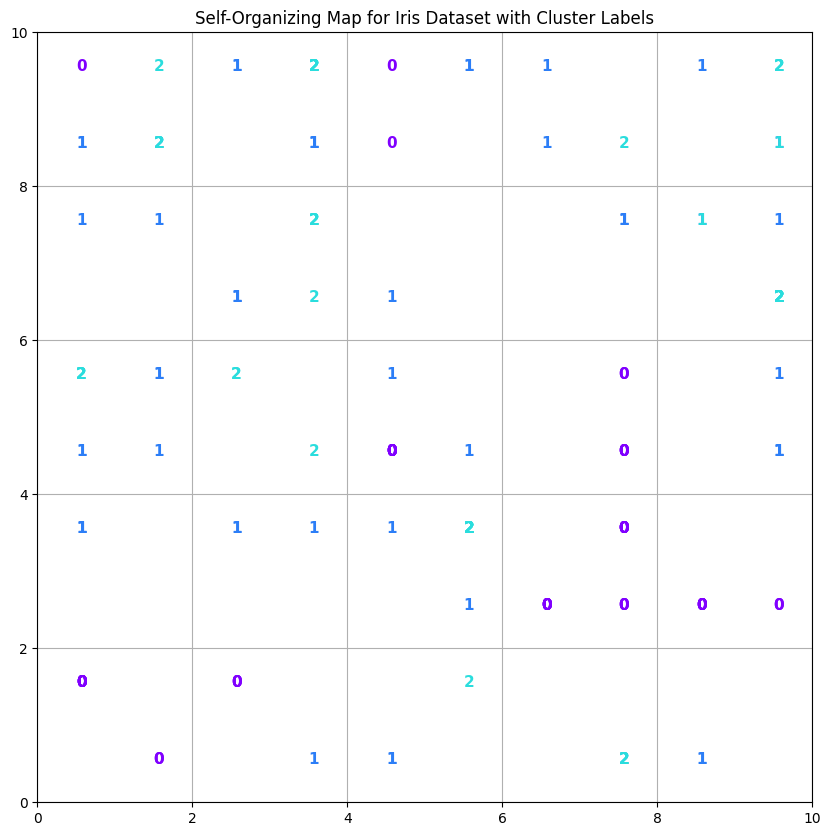

In [41]:
# Plot the results with cluster labels
plt.figure(figsize=(10, 10))
plt.grid(True)
for i, x in enumerate(data):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, # This is the position on the map
                                     # Adding 0.5 anchor the text in the center of the cell
             str(bmu_cluster_labels[w]), # This is the string on the map to show
             color=plt.cm.rainbow(target[i] / 2 / 3), # target[i] / 2 / 3 scales the class label (which is 0, 1, or 2) to a value between 0 and 1. This is done by dividing by 2 and then by 3
             fontdict={'weight': 'bold', 'size': 11})

# [xmin, xmax, ymin, ymax]: This specifies the lower and upper limits for the x-axis and y-axis, respectively.
plt.axis([0, som.get_weights().shape[0], 0, som.get_weights().shape[1]])
plt.title('Self-Organizing Map for Iris Dataset with Cluster Labels')
plt.show()

### <span style="color:#12372A; font-weight: bold; font-family: monospace">Inferencing</span>

In [49]:
# Function to find the cluster for a given input
def find_cluster(som, input_data):
    norm_input = scaler.transform([input_data])
    winner = som.winner(norm_input[0])
    cluster_label = bmu_cluster_labels[winner]
    return cluster_label

# Example inference with new data
new_data = np.array(data[0])
cluster = find_cluster(som, new_data)
print(f"Cluster for the new data {new_data}: {cluster}")

Cluster for the new data [0.22222222 0.625      0.06779661 0.04166667]: 0


In [48]:
# Verifying it
data[0], target[0]

(array([0.22222222, 0.625     , 0.06779661, 0.04166667]), 0)